In [1]:
import numpy as np
from planning_utilsX import a_star, a_star2, heuristic, create_grid

In [2]:
def colinear(p1, p2, p3): 
    colinear = False
    det = p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1] - p1[1]) + p3[0]*(p1[1] - p2[1])
    if det == 0:
        colinear = True
    return colinear

def prune(path):
    prunedpath = []
    if len(path) > 0:
        prunedpath.append(path[0])
        for i in range(len(path)):
            if i > 1:
                if not colinear(path[i-2], path[i-1], path[i]):
                    prunedpath.append(path[i-1])
        prunedpath.append(path[i])
    return prunedpath

In [3]:
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5

# Read in obstacle map
data = np.loadtxt('colliders.csv', delimiter=',', dtype='Float64', skiprows=2)

# Define a grid for a particular altitude and safety margin around obstacles
grid, north_offset, east_offset = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
print("North offset = {0}, east offset = {1}".format(north_offset, east_offset))
# Define starting point on the grid (at grid center)
grid_start = (-north_offset, -east_offset)
# Set goal
grid_goal = (-north_offset + 503, -east_offset - 151)

# Run A* to find a path from start to goal
print('Local Start and Goal: ', grid_start, grid_goal)




North offset = -316, east offset = -445
Local Start and Goal:  (316, 445) (819, 294)


In [4]:
# Old A* with non-Knight (plot in blue)
path, cost = a_star(grid, heuristic, grid_start, grid_goal, False)
print("cost:", cost)

# Convert path to waypoints
waypoints = [[p[0] + north_offset, p[1] + east_offset] for p in path]
waypointsB = prune(waypoints)
for p in waypointsB:
    print("{0}, {1}".format(p[0], p[1]))

Found a path on the grid. Cycles: 112254
cost: 138819.2437741897
0, 0
22, -22
25, -22
28, -19
80, -19
128, -67
130, -67
158, -39
250, -39
274, -63
278, -59
320, -59
324, -63
328, -59
390, -59
429, -98
438, -89
480, -89
500, -109
500, -139
503, -142
503, -151


In [5]:
# New A* with non-Knight (plot in red)
path, cost = a_star2(grid, heuristic, grid_start, grid_goal, False)
print("cost:", cost)

# Convert path to waypoints
waypoints = [[p[0] + north_offset, p[1] + east_offset] for p in path]
waypointsR = prune(waypoints)
for p in waypointsR:
    print("{0}, {1}".format(p[0], p[1]))

Found a path on the grid. Cycles: 30959
cost: 599.1614716074885
0, 0
67, 0
68, -1
98, -1
108, -11
168, -11
178, -21
208, -21
218, -31
240, -31
241, -32
242, -32
243, -33
244, -33
245, -34
247, -34
248, -35
249, -35
250, -36
251, -36
252, -37
253, -37
254, -38
255, -38
256, -39
257, -39
258, -40
260, -40
261, -41
262, -41
263, -42
264, -42
265, -43
266, -43
267, -44
268, -44
269, -45
271, -45
272, -46
273, -46
274, -47
275, -47
276, -48
277, -48
278, -49
279, -49
280, -50
282, -50
283, -51
284, -51
285, -52
286, -52
287, -53
288, -53
289, -54
290, -54
291, -55
293, -55
294, -56
295, -56
296, -57
297, -57
298, -58
299, -58
300, -59
320, -59
324, -63
328, -59
390, -59
429, -98
438, -89
480, -89
500, -109
500, -145
501, -146
501, -147
502, -148
502, -150
503, -151


In [6]:
# New A* with Knight (plot in green)
path, cost = a_star2(grid, heuristic, grid_start, grid_goal, True)
print("cost:", cost)

# Convert path to waypoints
waypoints = [[p[0] + north_offset, p[1] + east_offset] for p in path]
waypointsG = prune(waypoints)
for p in waypointsG:
    print("{0}, {1}".format(p[0], p[1]))


Found a path on the grid. Cycles: 28591
cost: 589.9862435434165
0, 0
36, -18
38, -18
40, -19
79, -19
139, -49
159, -39
249, -39
289, -59
319, -59
323, -61
329, -58
331, -59
389, -59
391, -60
423, -92
427, -94
439, -88
441, -89
479, -89
481, -90
490, -108
491, -108
493, -109
500, -109
500, -140
501, -142
501, -145
502, -147
502, -149
503, -151


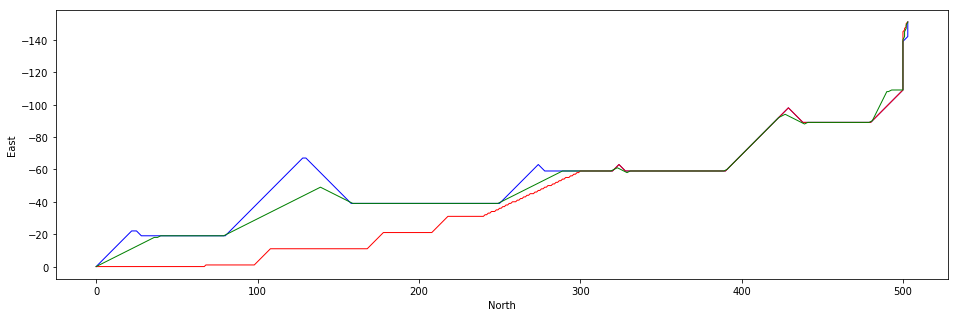

In [9]:
import matplotlib.pyplot as plt

plt.plot([p[0] for p in waypointsB], [p[1] for p in waypointsB], linewidth=1, c='b')
plt.plot([p[0] for p in waypointsR], [p[1] for p in waypointsR], linewidth=1, c='r')
plt.plot([p[0] for p in waypointsG], [p[1] for p in waypointsG], linewidth=1, c='g')

fig = plt.gcf()
fig.set_size_inches(16, 4.95)
plt.xlabel("North")
plt.ylabel("East")
plt.gca().invert_yaxis()
plt.show()

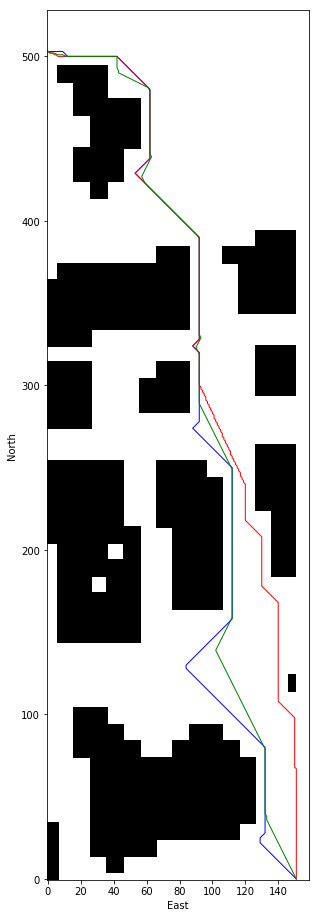

In [10]:
import matplotlib.pyplot as plt

gridshow, north_offset, east_offset = create_grid(data, 0, 0)

im = plt.imshow(gridshow[316:819,294:445], cmap='binary')
plt.plot([p[1]-east_offset-294 for p in waypointsB], [p[0] for p in waypointsB], linewidth=1, c='b')
plt.plot([p[1]-east_offset-294 for p in waypointsR], [p[0] for p in waypointsR], linewidth=1, c='r')
plt.plot([p[1]-east_offset-294 for p in waypointsG], [p[0] for p in waypointsG], linewidth=1, c='g')

fig = plt.gcf()
fig.set_size_inches(4.95, 16)
plt.xlabel("East")
plt.ylabel("North")
plt.gca().invert_yaxis()
plt.show()